In [ ]:
import numpy as np

def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

In [ ]:
%timeit dft(x)
%timeit np.fft.fft(x)

10 loops, best of 5: 124 ms per loop
The slowest run took 4.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 15.7 µs per loop


In [ ]:
def fft_v(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
    return X.ravel()

In [ ]:
x = np.random.random(1024)
np.allclose(fft_v(x), np.fft.fft(x))

True

In [ ]:
%timeit fft_v(x)
%timeit np.fft.fft(x)

1000 loops, best of 5: 384 µs per loop
The slowest run took 68.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 16 µs per loop


In [ ]:
!rm -rf sample_data
!gdown --id 1uuPYlGG0HDOpEHZ9UzE44FRTIF2bEsbH

Downloading...
From: https://drive.google.com/uc?id=1uuPYlGG0HDOpEHZ9UzE44FRTIF2bEsbH
To: /content/DSC_1259.jpg
100% 3.03M/3.03M [00:00<00:00, 95.1MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [ ]:
dark_image = imread('DSC_1259.jpg')

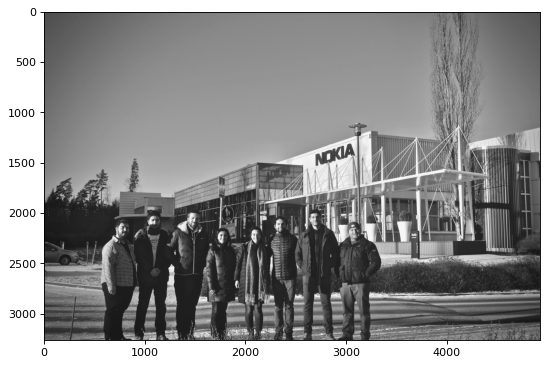

In [ ]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

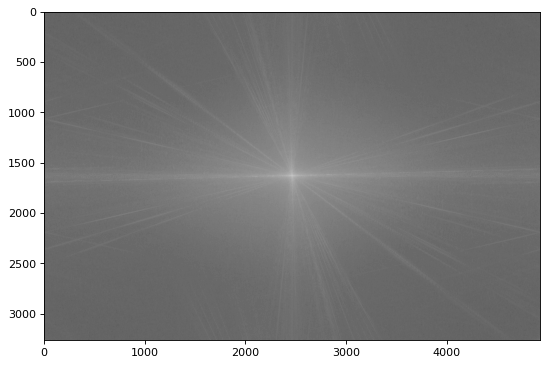

In [ ]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

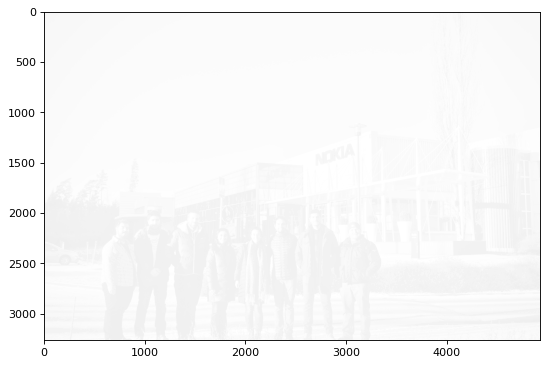

In [ ]:
back_dark_image_grey = np.fft.ifft2(dark_image_grey_fourier)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(back_dark_image_grey)), cmap='gray');

In [ ]:
from scipy.io import wavfile

In [ ]:
!gdown --id 18Zl6UJK9GUBWWz7T_Lt0JtxtGWgVP9iJ
freq_sample, sig_audio = wavfile.read("/content/recording.wav")

Downloading...
From: https://drive.google.com/uc?id=18Zl6UJK9GUBWWz7T_Lt0JtxtGWgVP9iJ
To: /content/recording.wav
100% 917k/917k [00:00<00:00, 58.8MB/s]


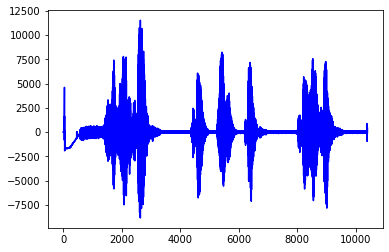

In [ ]:
time_axis = 1000 * np.arange(0, len(sig_audio), 1) / float(freq_sample)
plt.plot(time_axis, sig_audio, color='blue')

In [ ]:
freq_sample
#plt.plot(freq_sample, sig_audio, color='blue')

44100

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


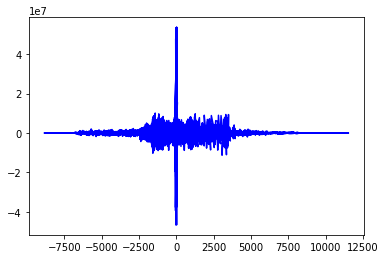

In [ ]:
fourier = np.fft.fftshift(np.fft.fft(sig_audio))
plt.plot(sig_audio,fourier , color='blue')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


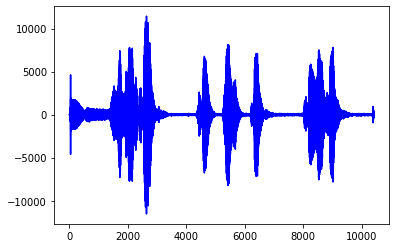

In [ ]:
fourier
back_data = np.fft.ifft(fourier)
plt.plot(time_axis, back_data, color='blue')


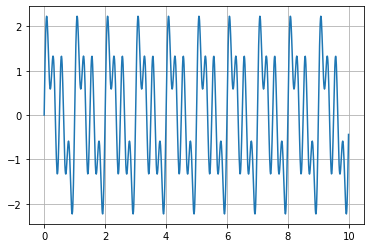

In [ ]:

import numpy as np

import matplotlib.pyplot as plt

 

# Time period

t = np.arange(0, 10, 0.01);

 

# Create a sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)

a = np.sin(2*np.pi*t) + np.sin(2*2*np.pi*t) + np.sin(4*2*np.pi*t);

 

# Do a Fourier transform on the signal

tx  = np.fft.fft(a);

 

# Do an inverse Fourier transform on the signal

itx = np.fft.ifft(tx);

 

# Plot the original sine wave using inverse Fourier transform

plt.plot(t, a);
plt.grid(True)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


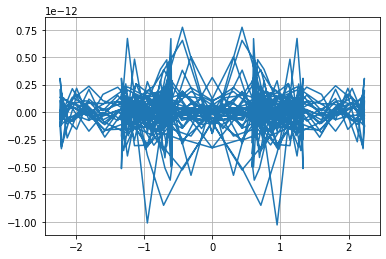

In [ ]:
plt.plot(a, tx);
plt.grid(True)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


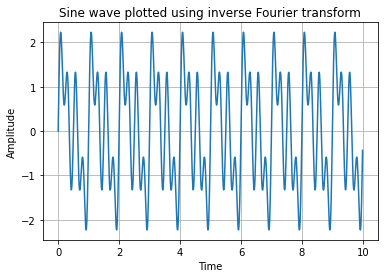

In [ ]:
plt.plot(t, itx);
plt.title("Sine wave plotted using inverse Fourier transform");
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show();